In [4]:
from datetime import date, datetime, timedelta
import yfinance as yfin
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader
from pandas_datareader.fred import FredReader
import rnd_stuff.tr_approx as approx
import matplotlib as mpl

In [5]:
mpl.rcParams['figure.figsize'] = [18.0, 10.0]

In [6]:
## https://fred.stlouisfed.org/series/BAMLCC7A01015YTRIV
## ICE BofA 10-15 Year US Corporate Index Total Return
## Index Value (BAMLCC7A01015YTRIV)
## https://fred.stlouisfed.org/series/BAMLCC3A057YTRIV
## ICE BofA 5-7 Year US Corporate Index Total Return #
## Index Value (BAMLCC3A057YTRIV)
uscorp_ix = FredReader(
    ['BAMLCC3A057YTRIV', 'BAMLCC7A01015YTRIV'],
    start=datetime.today() - timedelta(days=365*100)
).read()
uscorp_ix

,BAMLCC3A057YTRIV,BAMLCC7A01015YTRIV
DATE,,
1976-03-31,NaN,105.88
1976-04-01,NaN,NaN
1976-04-02,NaN,NaN
1976-04-05,NaN,NaN
1976-04-06,NaN,NaN
...,...,...
2021-10-25,847.09,4660.65
2021-10-26,847.49,4672.24
2021-10-27,850.01,4711.92


In [12]:
df = pd.DataFrame()
# Vanguard Long-Term Corporate Bond ETF (VCLT)
df['lt_corp_etf'] = yfin.Ticker('vclt').history(period='max')['Close']

# Vanguard Intermediate-Term Corporate Bond ETF (VCIT)
df['mt_corp_etf'] = yfin.Ticker('vcit').history(period='max')['Close']
df

,lt_corp_etf,mt_corp_etf
Date,,
2009-11-23,44.735416,49.808262
2009-11-24,44.735416,50.033596
2009-11-25,45.020744,50.099857
2009-11-27,45.086174,50.186028
2009-11-30,45.175308,50.325184
...,...,...
2021-10-26,106.250000,93.709999
2021-10-27,107.410004,94.019997
2021-10-28,107.160004,93.879997


In [13]:
df[['ix_5-7', 'ix_10-15']] = uscorp_ix[['BAMLCC3A057YTRIV', 'BAMLCC7A01015YTRIV']]
df

,lt_corp_etf,mt_corp_etf,ix_5-7,ix_10-15
Date,,,,
2009-11-23,44.735416,49.808262,445.46,2101.63
2009-11-24,44.735416,50.033596,446.69,2108.81
2009-11-25,45.020744,50.099857,447.52,2115.74
2009-11-27,45.086174,50.186028,448.88,2123.89
2009-11-30,45.175308,50.325184,448.75,2122.63
...,...,...,...,...
2021-10-26,106.250000,93.709999,847.49,4672.24
2021-10-27,107.410004,94.019997,850.01,4711.92
2021-10-28,107.160004,93.879997,848.13,4693.51


In [14]:
df = df.ffill().dropna()

In [15]:
ret = df/df.shift(365, freq='D')
ret = ret.dropna()
ret

,lt_corp_etf,mt_corp_etf,ix_5-7,ix_10-15
Date,,,,
2010-11-23,1.101475,1.122312,1.126745,1.144930
2010-11-24,1.092101,1.110233,1.116076,1.129666
2010-11-30,1.092193,1.108662,1.113248,1.128949
2010-12-01,1.090936,1.104205,1.106426,1.121370
2010-12-02,1.085412,1.104814,1.106912,1.122479
...,...,...,...,...
2021-10-22,1.026143,1.000198,1.008444,1.009837
2021-10-26,1.025608,1.001205,1.008436,1.009974
2021-10-27,1.029674,1.002323,1.010245,1.016023


<AxesSubplot:xlabel='Date'>

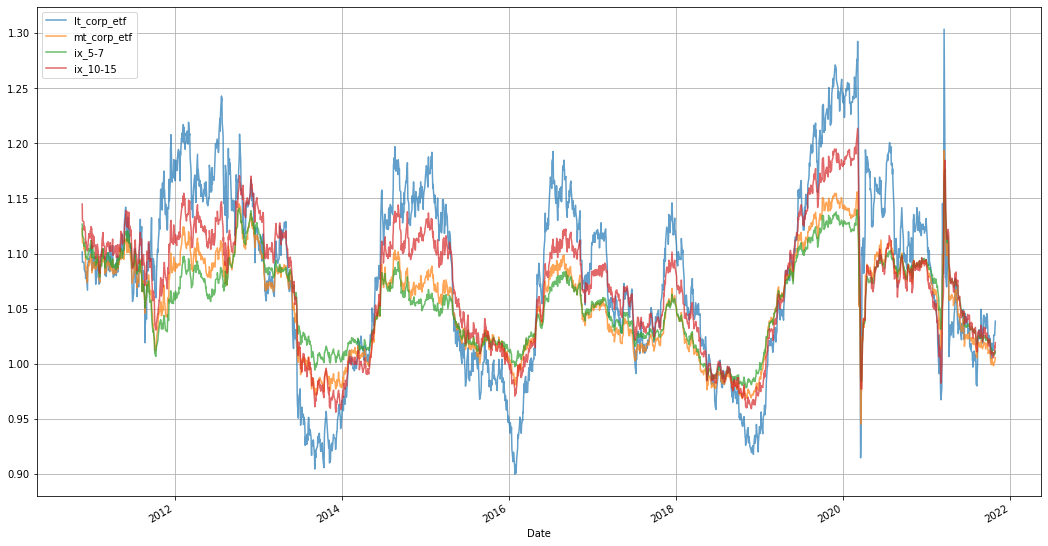

In [17]:
ret.plot(grid=True, alpha=0.7)